<a href="https://colab.research.google.com/github/marcioshochi/data-scientist-trainning/blob/master/treinamentoMachineLearning_exercicio01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [7]:
#selecionando filme dataframe
url = "https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv"
filmes = pd.read_csv(url)
filmes.columns = ["filme_id", "titulo", "generos"]
filmes.head(10)

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [11]:
# selecionando generos do filme no dataframe
generos = filmes.generos.str.get_dummies()
generos.head(10)

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [13]:
# juntando dataframe filmes e generos no mesmo dataframe
dados_dos_filmes = pd.concat([filmes, generos], axis=1)
dados_dos_filmes.head(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,6,Heat (1995),Action|Crime|Thriller,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
6,7,Sabrina (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7,8,Tom and Huck (1995),Adventure|Children,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,9,Sudden Death (1995),Action,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,10,GoldenEye (1995),Action|Adventure|Thriller,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)
generos_escalados.shape

(9742, 20)

In [16]:
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters = 3)
modelo.fit(generos_escalados)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
print(generos.columns)
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[ 0.03482479 -0.2847397  -0.22091197 -0.25262661 -0.26915725  0.19511689
  -0.18950483  0.12405712  0.1670904  -0.16676585 -0.077594   -0.162061
  -0.10645276  0.01768253 -0.18761585  0.18557827 -0.23415063 -0.47271861
   0.08779781  0.04254194]
 [-0.05917995  0.12878381  1.10931972  1.94078854  2.11684496  0.15929761
  -0.32191099 -0.19993096 -0.59776377  1.20411866 -0.09492563 -0.27642177
   0.31182253  0.31256015 -0.13762909 -0.27269098  0.14136748 -0.47052824
  -0.1691444  -0.08992819]
 [-0.05917995  0.63894616  0.05490819 -0.23076673 -0.26729201 -0.54594003
   0.60325217 -0.21557247 -0.1469023  -0.11868759  0.23089865  0.51638328
   0.12372828 -0.17966777  0.51816365 -0.3340006   0.50993857  1.35961492
  -

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdbe411cba8>,
      dtype=object)

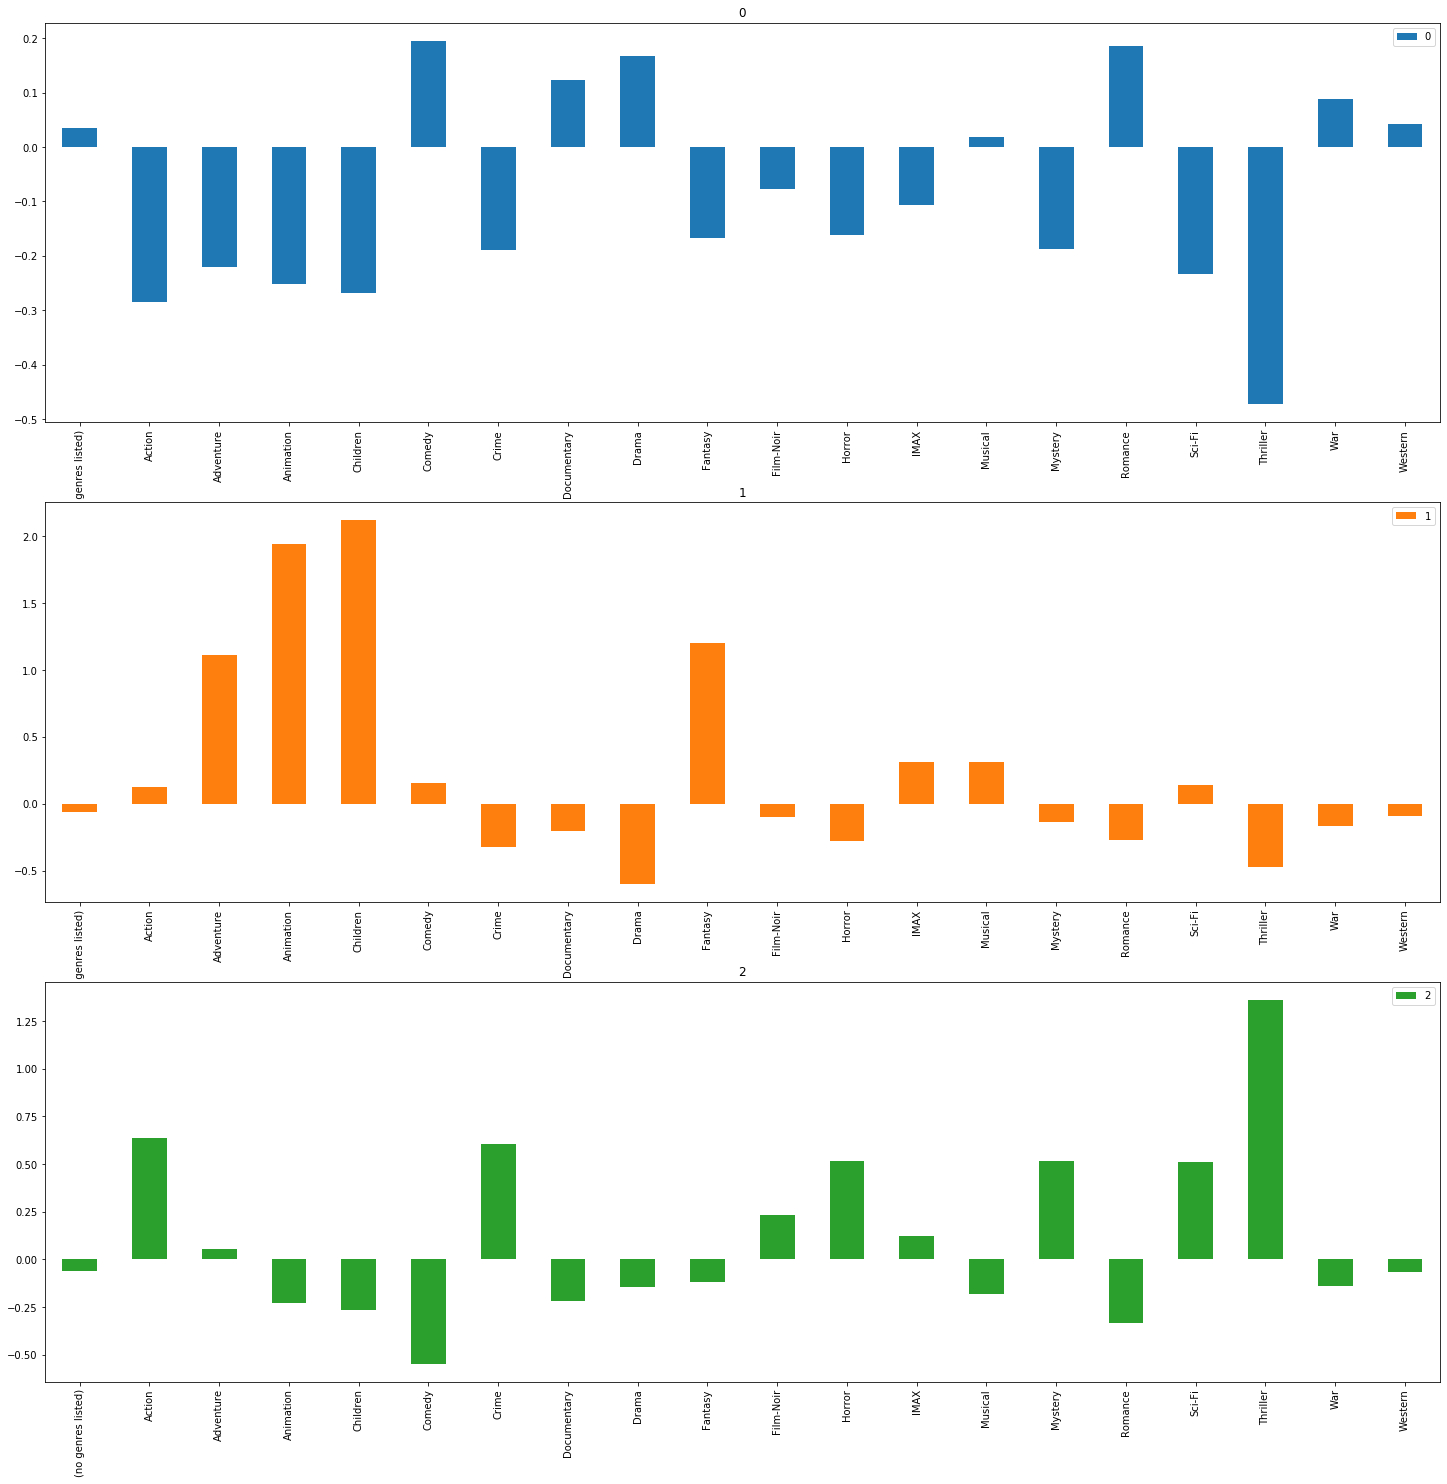

In [19]:
grupos = pd.DataFrame(modelo.cluster_centers_, columns = generos.columns)
grupos.transpose().plot.bar(subplots=True, figsize=(25, 25), sharex = False) 

In [21]:
grupo = 0
filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
3159,4248,Josie and the Pussycats (2001),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2137,2844,"Minus Man, The (1999)",Drama|Mystery,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2789,3730,"Conversation, The (1974)",Drama|Mystery,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
7024,68552,Crossing Over (2009),Drama,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4782,7121,Adam's Rib (1949),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1358,1855,Krippendorf's Tribe (1998),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2405,3192,"Terrorist, The (a.k.a. Malli) (Theeviravaathi)...",Drama,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1388,1904,Henry Fool (1997),Comedy|Drama,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8941,136469,Larry David: Curb Your Enthusiasm (1999),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4121,5915,Victory (a.k.a. Escape to Victory) (1981),Action|Drama|War,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [0]:
from sklearn.manifold import TSNE
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)


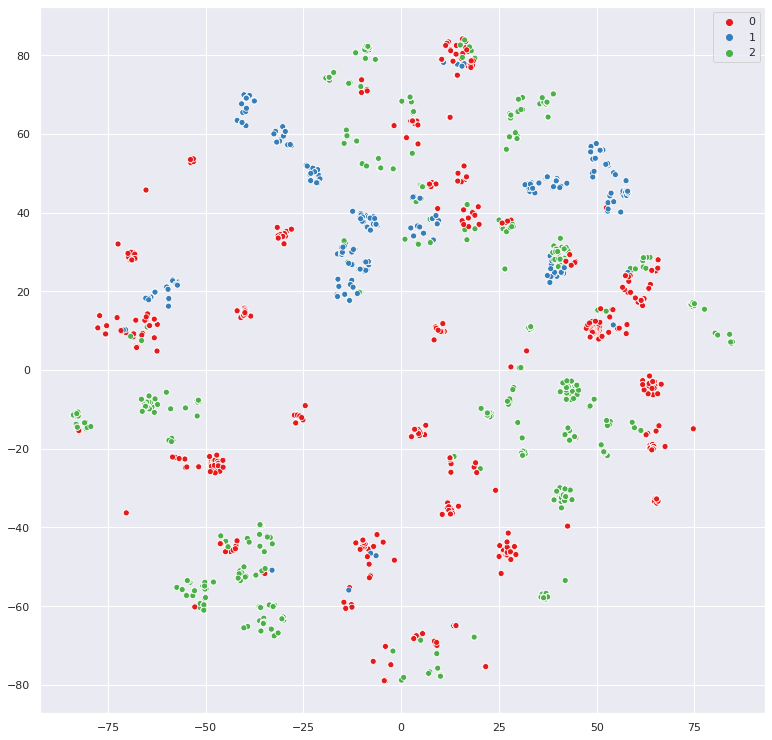

In [24]:
import seaborn as sns
sns.set(rc = {'figure.figsize': (13, 13)})
sns.scatterplot(x = visualizacao[:, 0], 
                y = visualizacao[:, 1],
                hue = modelo.labels_,
                palette=sns.color_palette('Set1', 3)
                )